__Spam Email & SMS detection__

    1. Data cleaning
    2. EDA
    3. Text Preprocessing
    4. Model building
    5. Evaluation
    6. Improvement
    7. Website
    8. Deploy

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding="ISO-8859-1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

1. Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.shape

(5572, 2)

In [9]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit_transform(df['target'])

array([0, 0, 1, ..., 0, 0, 0])

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
# duplicate values
df.duplicated().sum()

403

In [15]:
# remove duplicates values
df = df.drop_duplicates(keep='first')
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [16]:
df.shape

(5169, 2)

2. EDA

In [17]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x2288a9de1d0>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

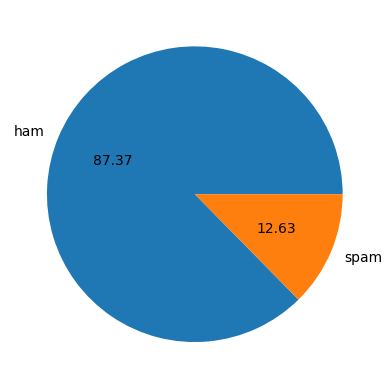

In [19]:
import matplotlib.pyplot as plt

plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')

In [20]:
# data is imblanced

In [21]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\emon1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
df['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [23]:
df['num_characters'] = df['text'].apply(len)
df.head()

C:\Users\emon1\AppData\Local\Temp\ipykernel_10748\83982535.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_words']

C:\Users\emon1\AppData\Local\Temp\ipykernel_10748\1149138423.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: num_words, Length: 5169, dtype: int64

In [25]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df['num_sentences']

C:\Users\emon1\AppData\Local\Temp\ipykernel_10748\2843694475.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: num_sentences, Length: 5169, dtype: int64

In [27]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
# for ham massages
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
# for spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

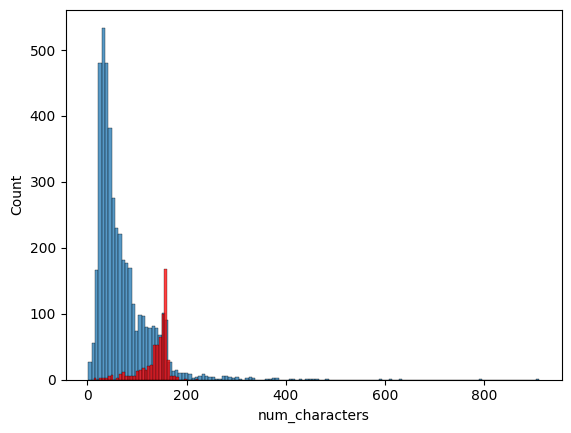

In [31]:
# plot this on hitogram
import seaborn as sns

sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

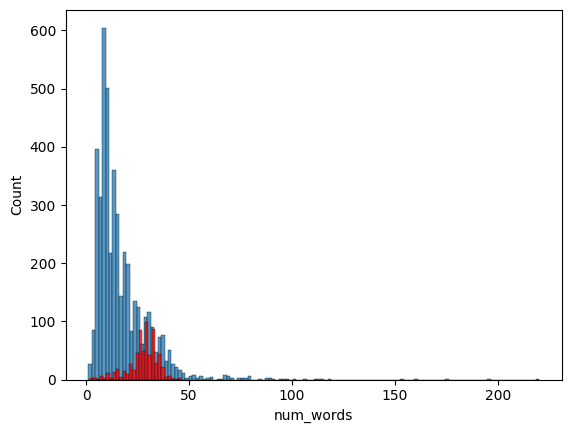

In [32]:
# plot this on hitogram
import seaborn as sns

sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

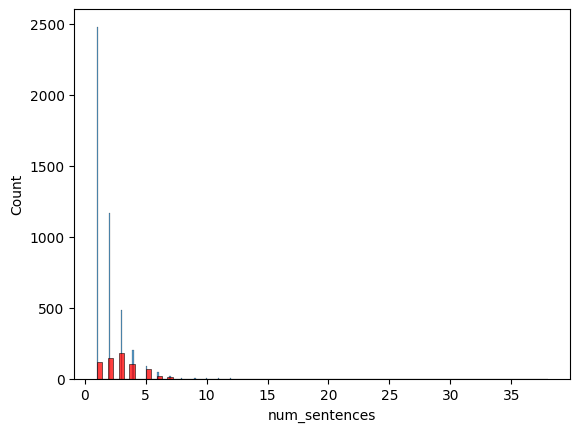

In [33]:
# plot this on hitogram
import seaborn as sns

sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'],color='red')

C:\Users\emon1\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


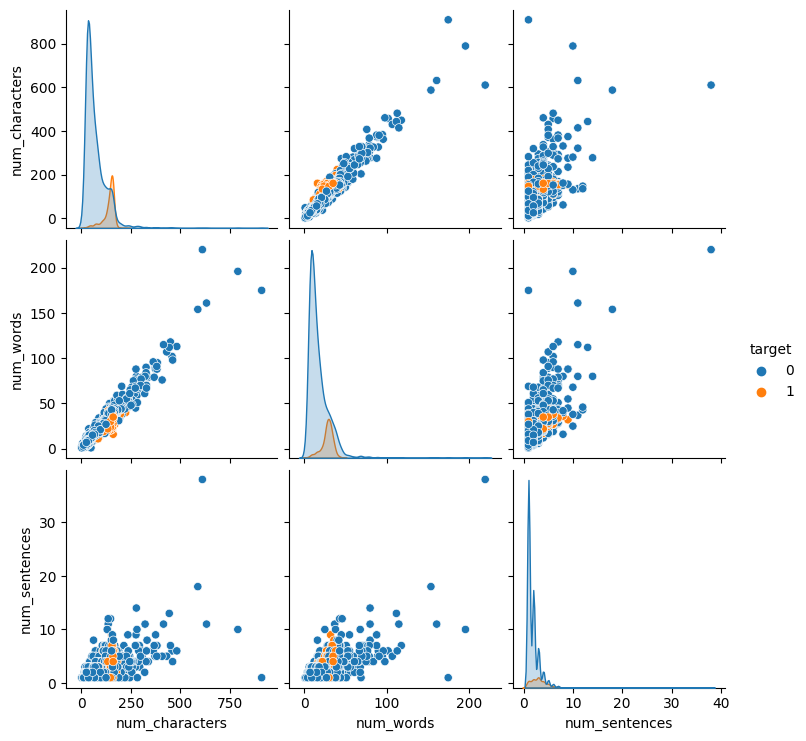

In [34]:
sns.pairplot(df,hue='target')

In [35]:
# sns.heatmap(df.corr(),annot=True)

3. Data Preprocessing
* Lower case
* Tokenization
* Removing special characters
* Removing stop words and punctuation
* Stemming

In [36]:
def trainsfrom_text(text):
    text = text.lower()
    return text

In [37]:
trainsfrom_text('HI How are you')

'hi how are you'

In [38]:
def trainsfrom_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    return text

In [39]:
trainsfrom_text('HI How are you')

['hi', 'how', 'are', 'you']

In [40]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [41]:
def trainsfrom_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    return y

In [42]:
trainsfrom_text('HI How are you 20% age')

['hi', 'how', 'are', 'you', '20', 'age']

In [43]:
trainsfrom_text('HI How are you %% 20 age')

['hi', 'how', 'are', 'you', '20', 'age']

In [44]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [45]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [46]:
def trainsfrom_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    return y

In [47]:
trainsfrom_text('Hi how Are you Nitish ?')

['hi', 'nitish']

In [48]:
trainsfrom_text('Did you like my presentation on ML?')

['like', 'presentation', 'ml']

In [49]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [50]:
def trainsfrom_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [51]:
trainsfrom_text('I Loved the YT leactures on Machine Learning. How about you?')

'love yt leactur machin learn'

In [52]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [53]:
trainsfrom_text("'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'")

'jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [54]:
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
ps.stem('loving')

'love'

In [55]:
df['transformed_text'] = df['text'].apply(trainsfrom_text)

C:\Users\emon1\AppData\Local\Temp\ipykernel_10748\2733764301.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(trainsfrom_text)


In [56]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [57]:
from wordcloud import WordCloud

wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

# create wordCloud object
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

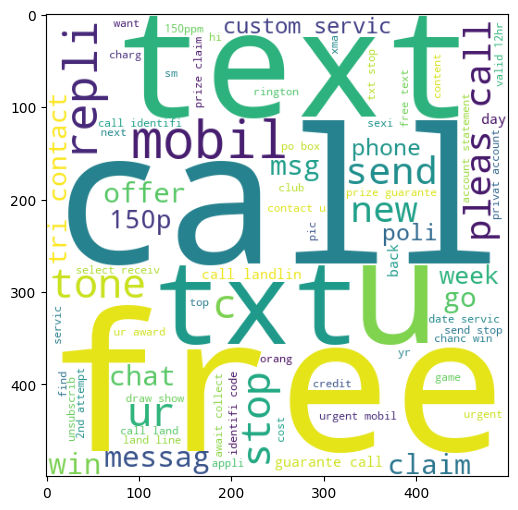

In [58]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [59]:
# create wordCloud object
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

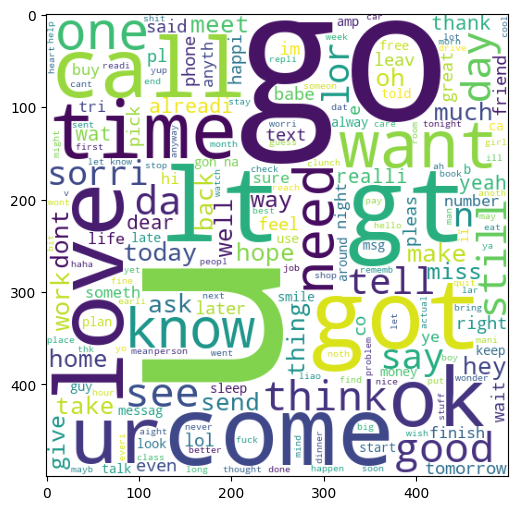

In [60]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [61]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [62]:
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    print(msg)

free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18
freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv
winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour
mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030
six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info
urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18
xxxmobilemovieclub use credit click wap link next txt messag click http
england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq
thank subscript rington uk mobil charg pleas confirm repli ye repli charg
07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow
sm ac sptv new jersey devil detroit red wi

In [63]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
print(spam_corpus)

['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt', '21st', 'may', 'text', 'fa', '87121', 'receiv', 'entri', 'question', 'std', 'txt', 'rate', 'c', 'appli', '08452810075over18', 'freemsg', 'hey', 'darl', '3', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chg', 'send', 'rcv', 'winner', 'valu', 'network', 'custom', 'select', 'receivea', 'prize', 'reward', 'claim', 'call', 'claim', 'code', 'kl341', 'valid', '12', 'hour', 'mobil', '11', 'month', 'u', 'r', 'entitl', 'updat', 'latest', 'colour', 'mobil', 'camera', 'free', 'call', 'mobil', 'updat', 'co', 'free', '08002986030', 'six', 'chanc', 'win', 'cash', '100', 'pound', 'txt', 'csh11', 'send', 'cost', '6day', 'tsandc', 'appli', 'repli', 'hl', '4', 'info', 'urgent', '1', 'week', 'free', 'membership', 'prize', 'jackpot', 'txt', 'word', 'claim', '81010', 'c', 'lccltd', 'pobox', '4403ldnw1a7rw18', 'xxxmobilemovieclub', 'use', 'credit', 'click', 'wap', 'link', 'next', 'txt', 'messag', 'click',

In [64]:
len(spam_corpus)

9939

In [65]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [66]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [67]:
# sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

In [68]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
print(ham_corpus)

['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor', 'wat', 'ok', 'lar', 'joke', 'wif', 'u', 'oni', 'u', 'dun', 'say', 'earli', 'hor', 'u', 'c', 'alreadi', 'say', 'nah', 'think', 'goe', 'usf', 'live', 'around', 'though', 'even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent', 'per', 'request', 'mell', 'oru', 'minnaminungint', 'nurungu', 'vettam', 'set', 'callertun', 'caller', 'press', '9', 'copi', 'friend', 'callertun', 'gon', 'na', 'home', 'soon', 'want', 'talk', 'stuff', 'anymor', 'tonight', 'k', 'cri', 'enough', 'today', 'search', 'right', 'word', 'thank', 'breather', 'promis', 'wont', 'take', 'help', 'grant', 'fulfil', 'promis', 'wonder', 'bless', 'time', 'date', 'sunday', 'oh', 'k', 'watch', 'eh', 'u', 'rememb', '2', 'spell', 'name', 'ye', 'v', 'naughti', 'make', 'v', 'wet', 'fine', 'thatåõ', 'way', 'u', 'feel', 'thatåõ', 'way', 'gota', 'b', 'serious', 'spell', 'name', 'go', 'tri', '2', 'month', 'ha', 

In [69]:
len(ham_corpus)

35404

In [70]:
# sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])

4. Model Building

In [71]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

x = tfidf.fit_transform(df['transformed_text']).toarray()

cv = CountVectorizer()

# x = cv.fit_transform(df['transformed_text']).toarray()

In [72]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [73]:
x.shape

(5169, 6708)

In [74]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [75]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [76]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print('accuracy score:...',accuracy_score(y_test,y_pred1))
print('confusion matrix:...',confusion_matrix(y_test,y_pred1))
print('precision_score:...',precision_score(y_test,y_pred1))

accuracy score:... 0.8762088974854932
confusion matrix:... [[793 103]
 [ 25 113]]
precision_score:... 0.5231481481481481


In [77]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print('accuracy score:...',accuracy_score(y_test,y_pred2))
print('confusion matrix:...',confusion_matrix(y_test,y_pred2))
print('precision_score:...',precision_score(y_test,y_pred2))

accuracy score:... 0.9593810444874274
confusion matrix:... [[896   0]
 [ 42  96]]
precision_score:... 1.0


In [78]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print('accuracy score:...',accuracy_score(y_test,y_pred3))
print('confusion matrix:...',confusion_matrix(y_test,y_pred3))
print('precision_score:...',precision_score(y_test,y_pred3))

accuracy score:... 0.9700193423597679
confusion matrix:... [[893   3]
 [ 28 110]]
precision_score:... 0.9734513274336283


In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

x = tfidf.fit_transform(df['transformed_text']).toarray()

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [81]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [82]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy,precision

In [83]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9729206963249516, 0.9741379310344828)

In [84]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    
    # run time 6m 45s

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DT
Accuracy -  0.9361702127659575
Precision -  0.8461538461538461
For  LR
Accuracy -  0.9516441005802708
Precision -  0.94
For  RF
Accuracy -  0.971953578336557
Precision -  1.0
For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8625954198473282
For  ETC
Accuracy -  0.9729206963249516
Precision -  0.9824561403508771
For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9238095238095239
For  xgb
Accuracy -  0.9700193423597679
Precision -  0.9349593495934959


In [85]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Accuracy',ascending=False)

In [86]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.972921,0.974138
8,ETC,0.972921,0.982456
5,RF,0.971954,1.000000
10,xgb,0.970019,0.934959
6,AdaBoost,0.961315,0.945455
2,NB,0.959381,1.000000
7,BgC,0.958414,0.862595
9,GBDT,0.952611,0.923810
4,LR,0.951644,0.940000
3,DT,0.936170,0.846154


In [87]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [88]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.972921
1,ETC,Accuracy,0.972921
2,RF,Accuracy,0.971954
3,xgb,Accuracy,0.970019
4,AdaBoost,Accuracy,0.961315
5,NB,Accuracy,0.959381
6,BgC,Accuracy,0.958414
7,GBDT,Accuracy,0.952611
8,LR,Accuracy,0.951644
9,DT,Accuracy,0.936170


C:\Users\emon1\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


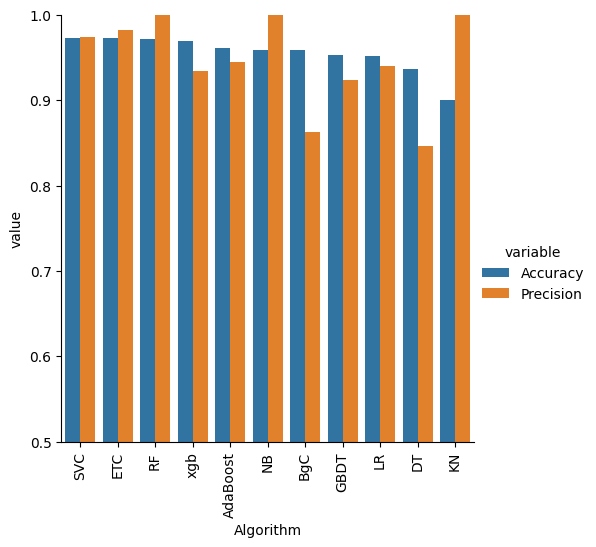

In [89]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [90]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft':accuracy_scores,'Precision_max_ft':precision_scores}).sort_values('Precision_max_ft',ascending=False)

In [91]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [92]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [93]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [94]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [95]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,SVC,0.972921,0.974138,0.972921,0.974138,0.972921,0.974138,0.972921,0.974138
1,ETC,0.972921,0.982456,0.972921,0.982456,0.972921,0.982456,0.972921,0.982456
2,RF,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000
3,xgb,0.970019,0.934959,0.970019,0.934959,0.970019,0.934959,0.970019,0.934959
4,AdaBoost,0.961315,0.945455,0.961315,0.945455,0.961315,0.945455,0.961315,0.945455
5,NB,0.959381,1.000000,0.959381,1.000000,0.959381,1.000000,0.959381,1.000000
6,BgC,0.958414,0.862595,0.958414,0.862595,0.958414,0.862595,0.958414,0.862595
7,GBDT,0.952611,0.923810,0.952611,0.923810,0.952611,0.923810,0.952611,0.923810
8,LR,0.951644,0.940000,0.951644,0.940000,0.951644,0.940000,0.951644,0.940000
9,DT,0.936170,0.846154,0.936170,0.846154,0.936170,0.846154,0.936170,0.846154


In [96]:
# voaint classifier
svc = SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)

In [97]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [98]:
voting.fit(x_train,y_train)
# run time 2m

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [99]:
mnb.fit(x_train,y_train)

MultinomialNB()

In [100]:
y_pred = voting.predict(x_test)
print('Accuracy:...',accuracy_score(y_test,y_pred))
print('Precision:...',precision_score(y_test,y_pred))

Accuracy:... 0.9787234042553191
Precision:... 1.0


In [101]:
# applying stacking
estimators = [('svm',svc),('nb',mnb),('et',etc)]
final_estimator = RandomForestClassifier()

In [102]:
from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [103]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print('Accuracy',accuracy_score(y_test,y_pred))
print('Precision',precision_score(y_test,y_pred))
# run time 9m 30s

Accuracy 0.9816247582205029
Precision 0.9612403100775194


In [104]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))